<a href="https://colab.research.google.com/github/ErialdoDFreitas/fuzzy-logic/blob/main/Controle_de_Elevadores_com_L%C3%B3gica_Fuzzy_ICA_Erialdo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 2.0 MB/s eta 0:00:00


### rascunhos

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definindo as variáveis de entrada
distancia_elev_andar = ctrl.Antecedent(np.arange(-0.1, 10.2, 0.1), 'Distancia_Elev_Andar')
direcao_elev = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'Direcao_Elev')
carga_pessoas = ctrl.Antecedent(np.arange(-0.5, 422.1, 0.1), 'Carga_Pessoas')

# Definindo a variável de saída
prioridade = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Prioridade')

# Funções de pertinência para Distancia_Elev_Andar
distancia_elev_andar['perto'] = fuzz.trapmf(distancia_elev_andar.universe, [-0.1, -0.1, 4, 5])
distancia_elev_andar['medio'] = fuzz.trimf(distancia_elev_andar.universe, [3.5, 6, 9])
distancia_elev_andar['longe'] = fuzz.trapmf(distancia_elev_andar.universe, [7.5, 9, 10, 10.1])

# Funções de pertinência para Direcao_Elev
direcao_elev['descendo'] = fuzz.trimf(direcao_elev.universe, [-1, -1, 0])
direcao_elev['subindo'] = fuzz.trimf(direcao_elev.universe, [-0.2, 0, 0.2])
direcao_elev['parado'] = fuzz.trimf(direcao_elev.universe, [0, 1, 1])

# Funções de pertinência para Carga_Pessoas
carga_pessoas['vazio'] = fuzz.trapmf(carga_pessoas.universe, [-0.5, 0, 68, 69.5])
carga_pessoas['leve'] = fuzz.trimf(carga_pessoas.universe, [60, 120, 180])
carga_pessoas['metade'] = fuzz.trimf(carga_pessoas.universe, [130, 210, 270])
carga_pessoas['max'] = fuzz.trapmf(carga_pessoas.universe, [230, 300, 420, 421])

# Funções de pertinência para Prioridade
prioridade['baixa'] = fuzz.trapmf(prioridade.universe, [0, 0.11, 3, 4])
prioridade['media'] = fuzz.trimf(prioridade.universe, [3, 5, 7])
prioridade['alta'] = fuzz.trapmf(prioridade.universe, [6, 8, 10, 10])

# Regras fuzzy
rule1 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['alta'])
rule2 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['media'])
rule3 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['baixa'])
rule4 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['media'])
rule5 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])
rule6 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['media'])
rule7 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])
rule8 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['media'])
rule9 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['baixa'])
rule10 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])
rule11 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])
rule12 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['max'], prioridade['media'])


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

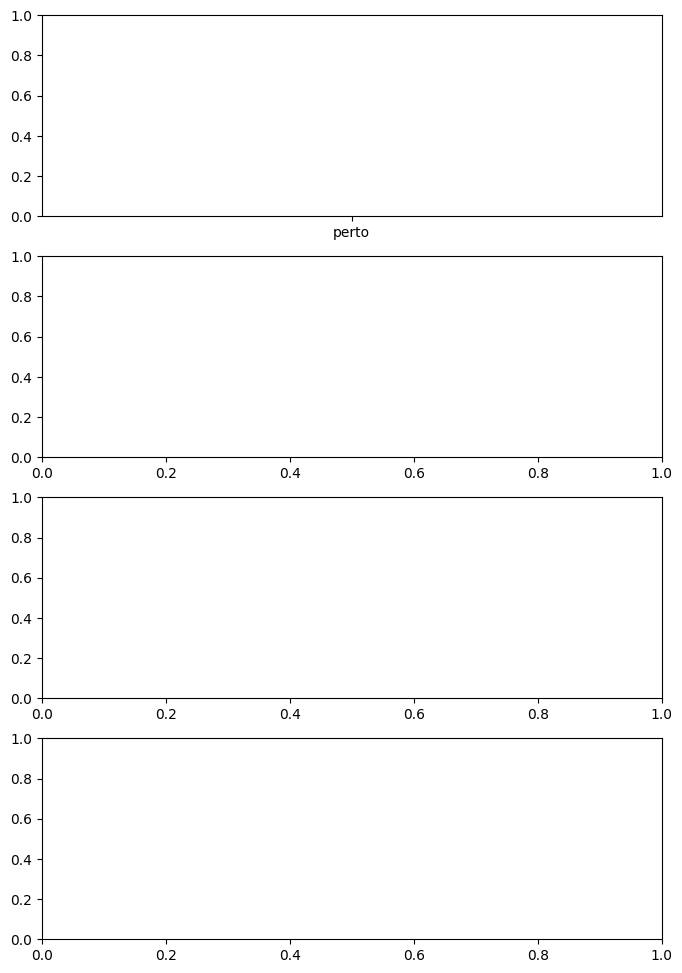

In [ ]:
import matplotlib.pyplot as plt

# Plotando as funções de pertinência
fig, axes = plt.subplots(nrows=4, figsize=(8, 12))

axes[0].plot(distancia_elev_andar, distancia_elev_andar['perto'], 'b', linewidth=1.5, label='Perto')
axes[0].plot(distancia_elev_andar, distancia_elev_andar['medio'], 'g', linewidth=1.5, label='Médio')
axes[0].plot(distancia_elev_andar, distancia_elev_andar['longe'], 'r', linewidth=1.5, label='Longe')
axes[0].set_title('Distância Elevador-Andar')
axes[0].legend()

axes[1].plot(direcao_elev, direcao_elev['descendo'], 'b', linewidth=1.5, label='descendo')
axes[1].plot(direcao_elev, direcao_elev['subindo'], 'g', linewidth=1.5, label='subindo')
axes[1].plot(direcao_elev, direcao_elev['parado'], 'r', linewidth=1.5, label='Parado')
axes[1].set_title('Direção Elevador')
axes[1].legend()

axes[2].plot(carga_pessoas, carga_pessoas['vazio'], 'b', linewidth=1.5, label='Vazio')
axes[2].plot(carga_pessoas, carga_pessoas['leve'], 'g', linewidth=1.5, label='Leve')
axes[2].plot(carga_pessoas, carga_pessoas['metade'], 'r', linewidth=1.5, label='Metade')
axes[2].plot(carga_pessoas, carga_pessoas['max'], 'y', linewidth=1.5, label='Máxima')
axes[2].set_title('Carga de Pessoas')
axes[2].legend()

axes[3].plot(prioridade, prioridade['baixa'], 'b', linewidth=1.5, label='Baixa')
axes[3].plot(prioridade, prioridade['media'], 'g', linewidth=1.5, label='Média')
axes[3].plot(prioridade, prioridade['alta'], 'r', linewidth=1.5, label='Alta')
axes[3].set_title('Prioridade')
axes[3].legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definindo as variáveis de entrada
distancia_elev_andar = np.arange(-0.1, 10.2, 0.1)
direcao_elev = np.arange(-1, 1.1, 0.1)
carga_pessoas = np.arange(-0.5, 422.1, 0.1)
prioridade = np.arange(0, 10.1, 0.1)

# Funções de pertinência para Distancia_Elev_Andar
distancia_perto = fuzz.trapmf(distancia_elev_andar, [-0.1, -0.1, 4, 5])
distancia_medio = fuzz.trimf(distancia_elev_andar, [3.5, 6, 9])
distancia_longe = fuzz.trapmf(distancia_elev_andar, [7.5, 9, 10, 10])

# Funções de pertinência para Direcao_Elev
direcao_descendo = fuzz.trimf(direcao_elev, [-1, -1, 0])
direcao_subindo = fuzz.trimf(direcao_elev, [-0.2, 0, 0.2])
direcao_parado = fuzz.trimf(direcao_elev, [0, 1, 1])

# Funções de pertinência para Carga_Pessoas
carga_vazio = fuzz.trapmf(carga_pessoas, [-0.5, -0.5, 68, 69.5])
carga_leve = fuzz.trimf(carga_pessoas, [60, 120, 180])
carga_metade = fuzz.trimf(carga_pessoas, [130, 210, 270])
carga_max = fuzz.trapmf(carga_pessoas, [230, 300, 420, 421])

# Funções de pertinência para Prioridade
prioridade_baixa = fuzz.trapmf(prioridade, [0, 0.11, 3, 4])
prioridade_media = fuzz.trimf(prioridade, [3, 5, 7])
prioridade_alta = fuzz.trapmf(prioridade, [6, 8, 10, 10])

# Regras fuzzy
rule1 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['alta'])
rule2 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['media'])
rule3 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['baixa'])
rule4 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['media'])
rule5 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])
rule6 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['media'])
rule7 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])
rule8 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['media'])
rule9 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['baixa'])
rule10 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])
rule11 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])
rule12 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['max'], prioridade['media'])

# Plotando as funções de pertinência
fig, axes = plt.subplots(nrows=4, figsize=(8, 12))

axes[0].plot(distancia_elev_andar, distancia_perto, 'b', linewidth=1.5, label='Perto')
axes[0].plot(distancia_elev_andar, distancia_medio, 'g', linewidth=1.5, label='Médio')
axes[0].plot(distancia_elev_andar, distancia_longe, 'r', linewidth=1.5, label='Longe')
axes[0].set_title('Distância Elevador-Andar')
axes[0].legend()

axes[1].plot(direcao_elev, direcao_descendo, 'b', linewidth=1.5, label='descendo')
axes[1].plot(direcao_elev, direcao_subindo, 'g', linewidth=1.5, label='subindo')
axes[1].plot(direcao_elev, direcao_parado, 'r', linewidth=1.5, label='Parado')
axes[1].set_title('Direção Elevador')
axes[1].legend()

axes[2].plot(carga_pessoas, carga_vazio, 'b', linewidth=1.5, label='Vazio')
axes[2].plot(carga_pessoas, carga_leve, 'g', linewidth=1.5, label='Leve')
axes[2].plot(carga_pessoas, carga_metade, 'r', linewidth=1.5, label='Metade')
axes[2].plot(carga_pessoas, carga_max, 'y', linewidth=1.5, label='Máxima')
axes[2].set_title('Carga de Pessoas')
axes[2].legend()

axes[3].plot(prioridade, prioridade_baixa, 'b', linewidth=1.5, label='Baixa')
axes[3].plot(prioridade, prioridade_media, 'g', linewidth=1.5, label='Média')
axes[3].plot(prioridade, prioridade_alta, 'r', linewidth=1.5, label='Alta')
axes[3].set_title('Prioridade')
axes[3].legend()

plt.tight_layout()
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Sistema de controle fuzzy
elevator_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
elevator_sim = ctrl.ControlSystemSimulation(elevator_ctrl)

# Exemplo de uso
elevator_sim.input['Distancia_Elev_Andar'] = 1
elevator_sim.input['Direcao_Elev'] = 0
elevator_sim.input['Carga_Pessoas'] = 500

elevator_sim.compute()
print(elevator_sim.output)

{}


In [ ]:
print(elevator_sim.output)

{'Prioridade': 1.927032182903743}


In [ ]:
print(elevator_sim.output['Prioridade'])

In [ ]:
import matplotlib.pyplot as plt

# Definindo as variáveis de entrada
distancia_elev_andar = np.arange(-0.1, 10.2, 0.1)
direcao_elev = np.arange(-1, 1.1, 0.1)
carga_pessoas = np.arange(-0.5, 422.1, 0.1)
prioridade = np.arange(0, 10.1, 0.1)

# Funções de pertinência para Distancia_Elev_Andar
distancia_perto = fuzz.trapmf(distancia_elev_andar, [-0.1, -0.1, 4, 5])
distancia_medio = fuzz.trimf(distancia_elev_andar, [3.5, 6, 9])
distancia_longe = fuzz.trapmf(distancia_elev_andar, [7.5, 9, 10, 10])

# Funções de pertinência para Direcao_Elev
direcao_descendo = fuzz.trimf(direcao_elev, [-1, -1, 0])
direcao_subindo = fuzz.trimf(direcao_elev, [-0.2, 0, 0.2])
direcao_parado = fuzz.trimf(direcao_elev, [0, 1, 1])

# Funções de pertinência para Carga_Pessoas
carga_vazio = fuzz.trapmf(carga_pessoas, [-0.5, -0.5, 68, 69.5])
carga_leve = fuzz.trimf(carga_pessoas, [60, 120, 180])
carga_metade = fuzz.trimf(carga_pessoas, [130, 210, 270])
carga_max = fuzz.trapmf(carga_pessoas, [230, 300, 420, 421])

# Funções de pertinência para Prioridade
prioridade_baixa = fuzz.trapmf(prioridade, [0, 0.11, 3, 4])
prioridade_media = fuzz.trimf(prioridade, [3, 5, 7])
prioridade_alta = fuzz.trapmf(prioridade, [6, 8, 10, 10])

# Plotando as funções de pertinência
fig, axes = plt.subplots(nrows=4, figsize=(8, 12))

axes[0].plot(distancia_elev_andar, distancia_perto, 'b', linewidth=1.5, label='Perto')
axes[0].plot(distancia_elev_andar, distancia_medio, 'g', linewidth=1.5, label='Médio')
axes[0].plot(distancia_elev_andar, distancia_longe, 'r', linewidth=1.5, label='Longe')
axes[0].set_title('Distância Elevador-Andar')
axes[0].legend()

axes[1].plot(direcao_elev, direcao_descendo, 'b', linewidth=1.5, label='descendo')
axes[1].plot(direcao_elev, direcao_subindo, 'g', linewidth=1.5, label='subindo')
axes[1].plot(direcao_elev, direcao_parado, 'r', linewidth=1.5, label='Parado')
axes[1].set_title('Direção Elevador')
axes[1].legend()

axes[2].plot(carga_pessoas, carga_vazio, 'b', linewidth=1.5, label='Vazio')
axes[2].plot(carga_pessoas, carga_leve, 'g', linewidth=1.5, label='Leve')
axes[2].plot(carga_pessoas, carga_metade, 'r', linewidth=1.5, label='Metade')
axes[2].plot(carga_pessoas, carga_max, 'y', linewidth=1.5, label='Máxima')
axes[2].set_title('Carga de Pessoas')
axes[2].legend()

axes[3].plot(prioridade, prioridade_baixa, 'b', linewidth=1.5, label='Baixa')
axes[3].plot(prioridade, prioridade_media, 'g', linewidth=1.5, label='Média')
axes[3].plot(prioridade, prioridade_alta, 'r', linewidth=1.5, label='Alta')
axes[3].set_title('Prioridade')
axes[3].legend()

plt.tight_layout()
plt.show()


# Sistema de controle fuzzy
elevator_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
elevator_sim = ctrl.ControlSystemSimulation(elevator_ctrl)

# Exemplo de uso
elevator_sim.input['Distancia_Elev_Andar'] = 1
elevator_sim.input['Direcao_Elev'] = 0
elevator_sim.input['Carga_Pessoas'] = 500

elevator_sim.compute()
print(elevator_sim.output)

#### Usando o andar da pessoa como um valor Não-fuzzy

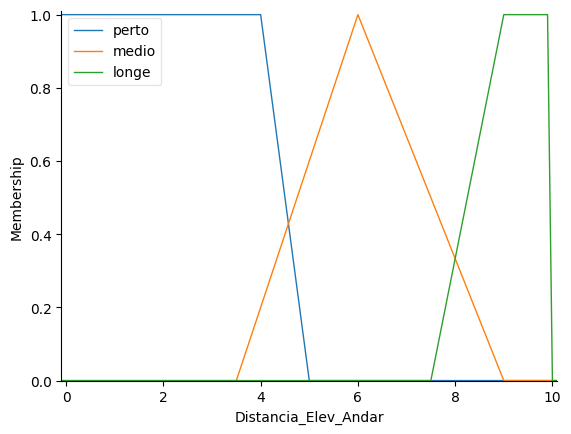

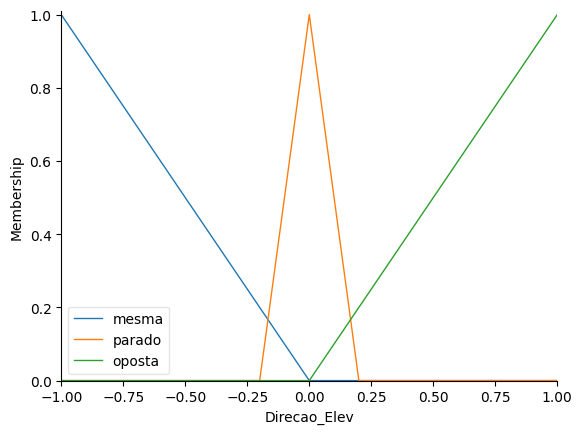

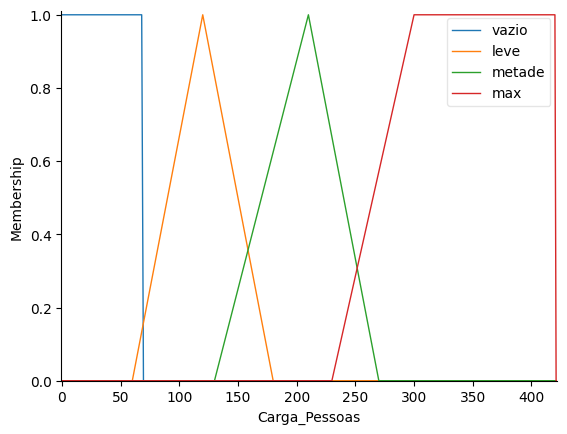

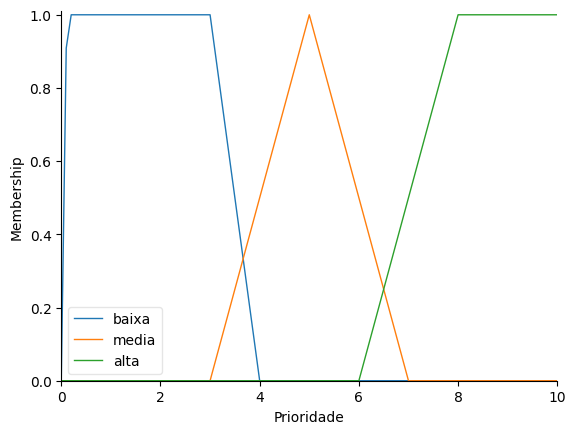

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definindo as variáveis de entrada (Antecedent)
distancia_elev_andar = ctrl.Antecedent(np.arange(-0.1, 10.2, 0.1), 'Distancia_Elev_Andar')
direcao_elev = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'Direcao_Elev')
carga_pessoas = ctrl.Antecedent(np.arange(-0.5, 422.1, 0.1), 'Carga_Pessoas')

# Definindo a variável de saída (Consequent)
prioridade = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Prioridade')

# Funções de pertinência para Distancia_Elev_Andar
distancia_elev_andar['perto'] = fuzz.trapmf(distancia_elev_andar.universe, [-0.1, -0.1, 4, 5])
distancia_elev_andar['medio'] = fuzz.trimf(distancia_elev_andar.universe, [3.5, 6, 9])
distancia_elev_andar['longe'] = fuzz.trapmf(distancia_elev_andar.universe, [7.5, 9, 10, 10])

# Funções de pertinência para Direcao_Elev
direcao_elev['descendo'] = fuzz.trimf(direcao_elev.universe, [-1, -1, 0])
direcao_elev['parado'] = fuzz.trimf(direcao_elev.universe, [-0.2, 0, 0.2])
direcao_elev['subindo'] = fuzz.trimf(direcao_elev.universe, [0, 1, 1])

# Funções de pertinência para Carga_Pessoas
carga_pessoas['vazio'] = fuzz.trapmf(carga_pessoas.universe, [-0.5, -0.5, 68, 69.5])
carga_pessoas['leve'] = fuzz.trimf(carga_pessoas.universe, [60, 120, 180])
carga_pessoas['metade'] = fuzz.trimf(carga_pessoas.universe, [130, 210, 270])
carga_pessoas['max'] = fuzz.trapmf(carga_pessoas.universe, [230, 300, 420, 421])

# Funções de pertinência para Prioridade
prioridade['baixa'] = fuzz.trapmf(prioridade.universe, [0, 0.11, 3, 4])
prioridade['media'] = fuzz.trimf(prioridade.universe, [3, 5, 7])
prioridade['alta'] = fuzz.trapmf(prioridade.universe, [6, 8, 10, 10])

# Regras fuzzy
# rule1 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['alta'])
# rule2 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['media'])
# rule3 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['baixa'])
# rule4 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['media'])
# rule5 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])
# rule6 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['media'])
# rule7 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])
# rule8 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['media'])
# rule9 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['baixa'])
# rule10 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])
# rule11 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])
# rule12 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['max'], prioridade['media'])

# Plotando as funções de pertinência (opcional)
distancia_elev_andar.view()
direcao_elev.view()
carga_pessoas.view()
prioridade.view()
plt.show()

In [ ]:
# Exemplo de uso
rule1 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['alta'])
rule2 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['media'])
rule3 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['baixa'])
rule4 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['media'])
rule5 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])
rule6 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['media'])
rule7 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])

andar_pessoa = 1

# Ajustando a regra de acordo com o andar da pessoa
if andar_pessoa <= 3 or (4 <= andar_pessoa <= 7):
    rule8 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['alta'])
    rule9 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['baixa'])
else:
    rule8 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['media'])
    rule9 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['baixa'])

rule10 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])
rule11 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])
rule12 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['max'], prioridade['baixa'])

print(f"prioridade type: type(prioridade['baixa']) \n")
# Sistema de controle fuzzy
elevator_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
elevator_sim = ctrl.ControlSystemSimulation(elevator_ctrl)


elevator_sim.input['Distancia_Elev_Andar'] = 2
elevator_sim.input['Direcao_Elev'] = -1
elevator_sim.input['Carga_Pessoas'] = 400

elevator_sim.compute()
print(elevator_sim.output)

prioridade type: type(prioridade['baixa']) 

{'Prioridade': 8.444444444444445}


#### Usando o andar da pessoa como uma variável Fuzzy

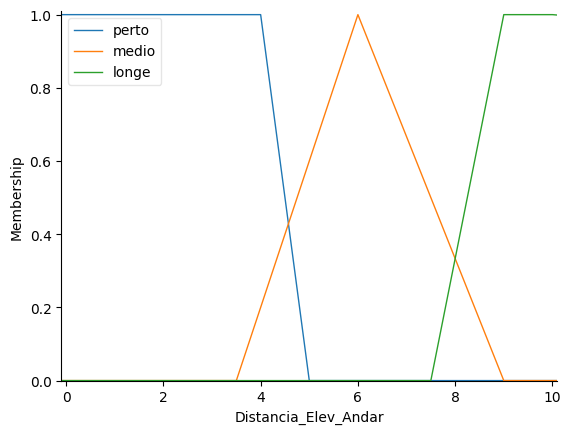

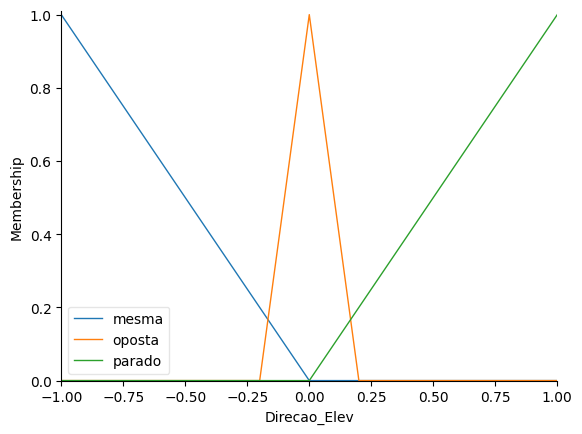

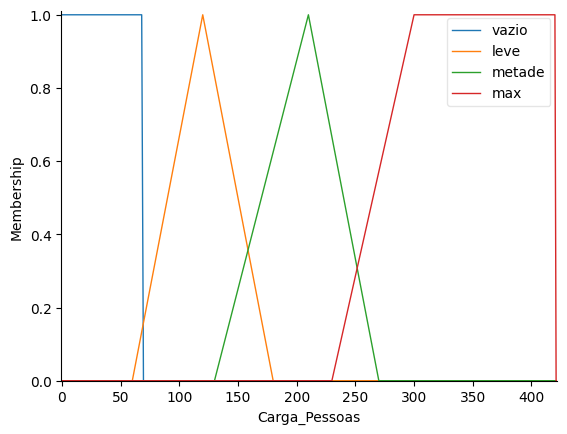

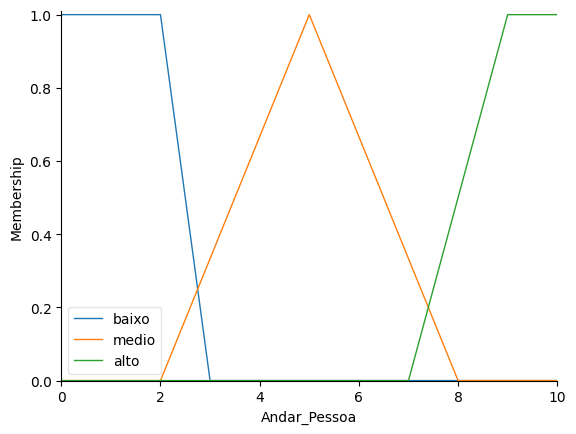

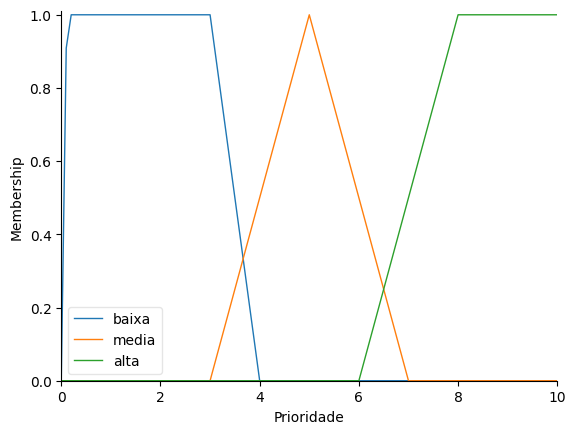

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definindo as variáveis de entrada (Antecedent)
distancia_elev_andar = ctrl.Antecedent(np.arange(-0.1, 10.2, 0.1), 'Distancia_Elev_Andar')
direcao_elev = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'Direcao_Elev')
carga_pessoas = ctrl.Antecedent(np.arange(-0.5, 422.1, 0.1), 'Carga_Pessoas')
andar_pessoa = ctrl.Antecedent(np.arange(0, 11, 1), 'Andar_Pessoa')

# Definindo a variável de saída (Consequent)
prioridade = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Prioridade')

# Funções de pertinência para Distancia_Elev_Andar
distancia_elev_andar['perto'] = fuzz.trapmf(distancia_elev_andar.universe, [-0.1, -0.1, 4, 5])
distancia_elev_andar['medio'] = fuzz.trimf(distancia_elev_andar.universe, [3.5, 6, 9])
distancia_elev_andar['longe'] = fuzz.trapmf(distancia_elev_andar.universe, [7.5, 9, 10, 100])

# Funções de pertinência para Direcao_Elev
direcao_elev['descendo'] = fuzz.trimf(direcao_elev.universe, [-1, -1, 0])
direcao_elev['subindo'] = fuzz.trimf(direcao_elev.universe, [-0.2, 0, 0.2])
direcao_elev['parado'] = fuzz.trimf(direcao_elev.universe, [0, 1, 1])

# Funções de pertinência para Carga_Pessoas
carga_pessoas['vazio'] = fuzz.trapmf(carga_pessoas.universe, [-0.5, -0.5, 68, 69.5])
carga_pessoas['leve'] = fuzz.trimf(carga_pessoas.universe, [60, 120, 180])
carga_pessoas['metade'] = fuzz.trimf(carga_pessoas.universe, [130, 210, 270])
carga_pessoas['max'] = fuzz.trapmf(carga_pessoas.universe, [230, 300, 420, 421])

# Funções de pertinência para Andar_Pessoa
andar_pessoa['baixo'] = fuzz.trapmf(andar_pessoa.universe, [0, 0, 2, 3])
andar_pessoa['medio'] = fuzz.trimf(andar_pessoa.universe, [2, 5, 8])
andar_pessoa['alto'] = fuzz.trapmf(andar_pessoa.universe, [7, 9, 10, 10])

# Funções de pertinência para Prioridade
prioridade['baixa'] = fuzz.trapmf(prioridade.universe, [0, 0.11, 3, 4])
prioridade['media'] = fuzz.trimf(prioridade.universe, [3, 5, 7])
prioridade['alta'] = fuzz.trapmf(prioridade.universe, [6, 8, 10, 10])


# Visualizar as funções de pertinência (opcional)
distancia_elev_andar.view()
direcao_elev.view()
carga_pessoas.view()
andar_pessoa.view()
prioridade.view()
plt.show()


In [ ]:

# Regras fuzzy (ajustadas para incluir Andar_Pessoa)
rule1 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['baixo'], prioridade['alta'])
rule2 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['medio'], prioridade['alta'])
rule3 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['alto'], prioridade['alta'])

rule4 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'] & andar_pessoa['baixo'], prioridade['media'])
rule5 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'] & andar_pessoa['medio'], prioridade['media'])
rule6 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'] & andar_pessoa['alto'], prioridade['media'])

rule7 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['leve'] & andar_pessoa['baixo'], prioridade['media'])
rule8 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['medio'], prioridade['baixa'])
rule9 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['alto'], prioridade['baixa'])

rule10 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['metade'] & andar_pessoa['baixo'], prioridade['media'])
rule11 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['medio'], prioridade['baixa'])
rule12 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['alto'], prioridade['baixa'])

rule13 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['max'] & andar_pessoa['baixo'], prioridade['media'])
rule14 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['max'] & andar_pessoa['medio'], prioridade['baixa'])
rule15 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['max'] & andar_pessoa['alto'], prioridade['baixa'])
rule16 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['subindo'] & carga_pessoas['max'] & andar_pessoa['medio'], prioridade['baixa'])
rule17 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['max'] & andar_pessoa['baixo'], prioridade['media'])

# Sistema de controle fuzzy
elevator_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
elevator_sim = ctrl.ControlSystemSimulation(elevator_ctrl)

# Exemplo de uso
elevator_sim.input['Distancia_Elev_Andar'] = -2
elevator_sim.input['Direcao_Elev'] = -1
elevator_sim.input['Carga_Pessoas'] = 0
elevator_sim.input['Andar_Pessoa'] = 7  # Definindo o andar da pessoa

elevator_sim.compute()

# Pós-processamento: Se a condição específica é atendida, força o valor para zero
# if elevator_sim.input['Andar_Pessoa'] > 8 and elevator_sim.input['Carga_Pessoas'] > 300:
#     elevator_sim.output['Prioridade'] = 0
if elevator_sim.input['Andar_Pessoa'] > 8 and elevator_sim.input['Carga_Pessoas'] > 300:
    elevator_sim.output['Prioridade'] = 0

print(elevator_sim.output['Prioridade'])

print(elevator_sim.output)


TypeError: '_InputAcceptor' object is not subscriptable

#### Nova abordagem fazendo verificações

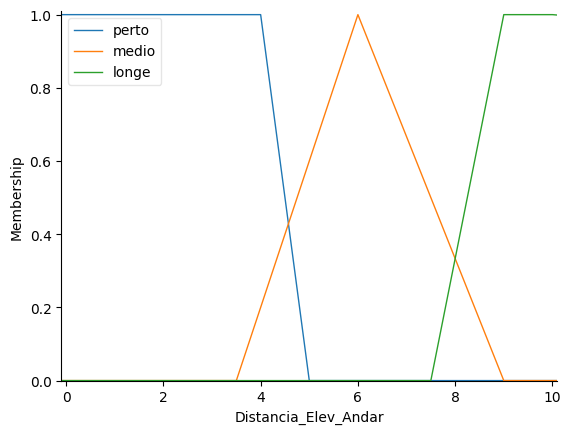

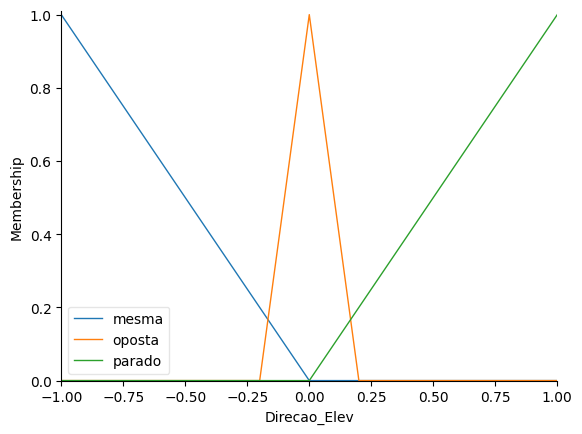

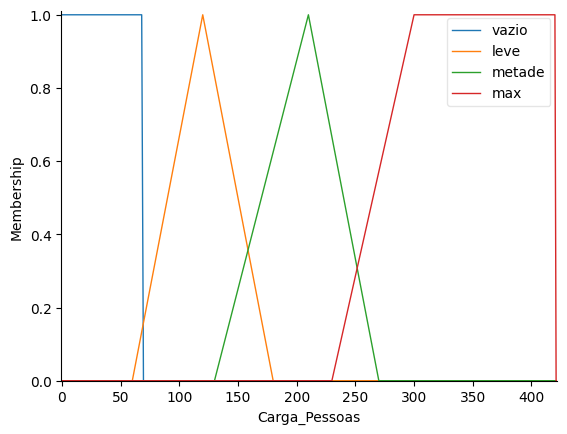

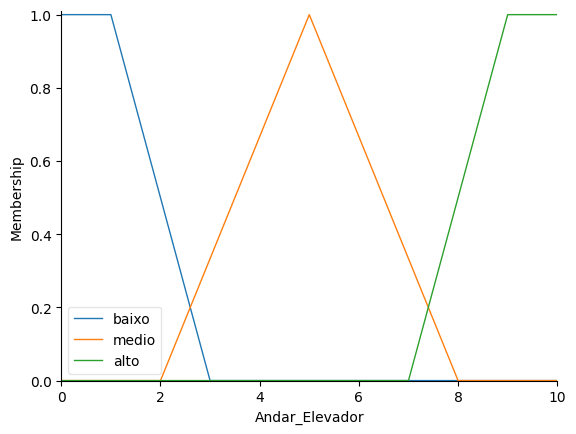

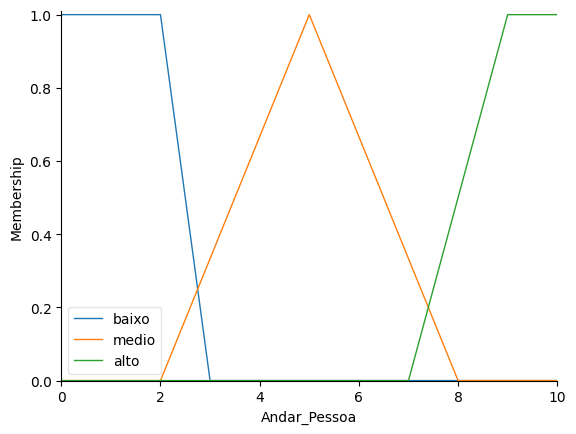

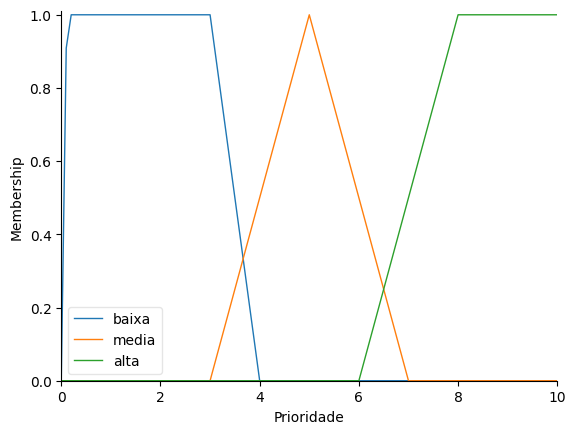

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definindo as variáveis de entrada (Antecedent)
distancia_elev_andar = ctrl.Antecedent(np.arange(-0.1, 10.2, 0.1), 'Distancia_Elev_Andar')
direcao_elev = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'Direcao_Elev')
carga_pessoas = ctrl.Antecedent(np.arange(-0.5, 422.1, 0.1), 'Carga_Pessoas')
# andar_elevador = ctrl.Antecedent(np.arange(0, 11, 1), 'Andar_Elevador')
# andar_pessoa = ctrl.Antecedent(np.arange(0, 11, 1), 'Andar_Pessoa')

# Definindo a variável de saída (Consequent)
prioridade = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Prioridade')


# Funções de pertinência para Distancia_Elev_Andar
distancia_elev_andar['perto'] = fuzz.trapmf(distancia_elev_andar.universe, [-0.1, -0.1, 4, 5])
distancia_elev_andar['medio'] = fuzz.trimf(distancia_elev_andar.universe, [3.5, 6, 9])
distancia_elev_andar['longe'] = fuzz.trapmf(distancia_elev_andar.universe, [7.5, 9, 10, 100])

# Funções de pertinência para Direcao_Elev
direcao_elev['descendo'] = fuzz.trimf(direcao_elev.universe, [-1, -1, 0])
direcao_elev['subindo'] = fuzz.trimf(direcao_elev.universe, [-0.2, 0, 0.2])
direcao_elev['parado'] = fuzz.trimf(direcao_elev.universe, [0, 1, 1])

# Funções de pertinência para Carga_Pessoas
carga_pessoas['vazio'] = fuzz.trapmf(carga_pessoas.universe, [-0.5, -0.5, 68, 69.5])
carga_pessoas['leve'] = fuzz.trimf(carga_pessoas.universe, [60, 120, 180])
carga_pessoas['metade'] = fuzz.trimf(carga_pessoas.universe, [130, 210, 270])
carga_pessoas['max'] = fuzz.trapmf(carga_pessoas.universe, [230, 300, 420, 421])

# # Funções de pertinência para o Andar_Elevador
# andar_elevador['baixo'] = fuzz.trapmf(andar_elevador.universe, [0, 0, 1, 3])
# andar_elevador['medio'] = fuzz.trimf(andar_elevador.universe, [2, 5, 8])
# andar_elevador['alto'] = fuzz.trapmf(andar_elevador.universe, [7, 9, 10, 10])

# # Funções de pertinência para Andar_Pessoa
# andar_pessoa['baixo'] = fuzz.trapmf(andar_pessoa.universe, [0, 0, 2, 3])
# andar_pessoa['medio'] = fuzz.trimf(andar_pessoa.universe, [2, 5, 8])
# andar_pessoa['alto'] = fuzz.trapmf(andar_pessoa.universe, [7, 9, 10, 10])

# Funções de pertinência para Prioridade
prioridade['baixa'] = fuzz.trapmf(prioridade.universe, [0, 0.11, 3, 4])
prioridade['media'] = fuzz.trimf(prioridade.universe, [3, 5, 7])
prioridade['alta'] = fuzz.trapmf(prioridade.universe, [6, 8, 10, 10])

# Visualizar as funções de pertinência (opcional)
distancia_elev_andar.view()
direcao_elev.view()
carga_pessoas.view()
andar_elevador.view()
andar_pessoa.view()
prioridade.view()
plt.show()


### Versão ajustada, sem as variáveis fuzzy de entrada Anda_Pessoa e Andar_Elevador

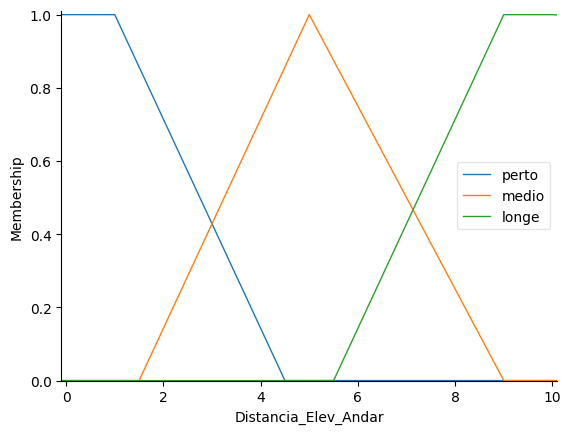

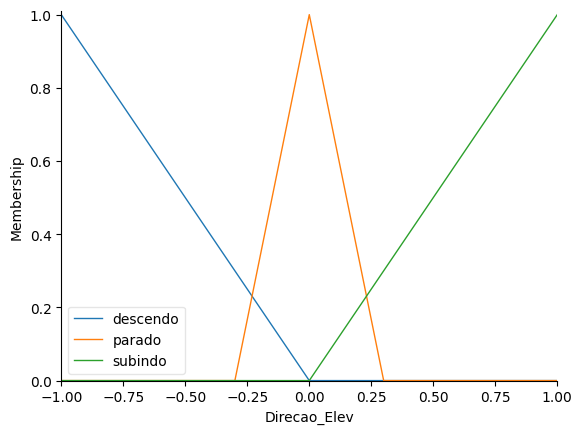

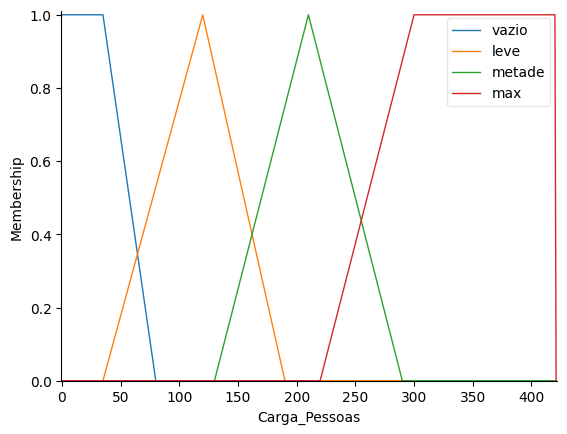

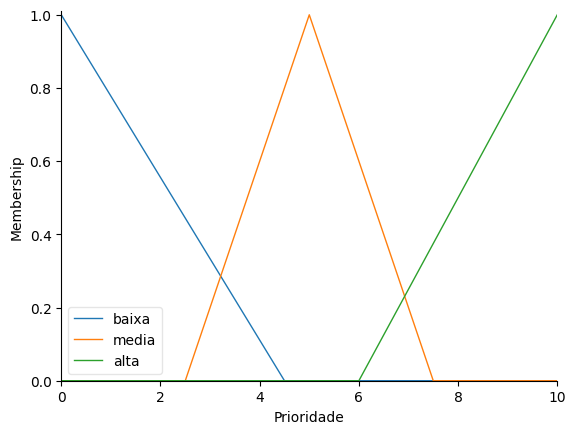

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definindo as variáveis de entrada (Antecedent)
distancia_elev_andar = ctrl.Antecedent(np.arange(-0.1, 10.2, 0.1), 'Distancia_Elev_Andar')
direcao_elev = ctrl.Antecedent(np.arange(-1, 1.1, 0.1), 'Direcao_Elev')
carga_pessoas = ctrl.Antecedent(np.arange(-0.5, 422.1, 0.1), 'Carga_Pessoas')
# andar_elevador = ctrl.Antecedent(np.arange(0, 11, 1), 'Andar_Elevador')
# andar_pessoa = ctrl.Antecedent(np.arange(0, 11, 1), 'Andar_Pessoa')

# Definindo a variável de saída (Consequent), com U.D de 0 até 10
prioridade = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Prioridade', defuzzify_method="centroid")
# prioridade = ctrl.Consequent(np.arange(0, 100, 1), 'Prioridade', defuzzify_method="centroid")


# Funções de pertinência para Distancia_Elev_Andar
distancia_elev_andar['perto'] = fuzz.trapmf(distancia_elev_andar.universe, [-0.1, -0.1, 1, 4.5])
distancia_elev_andar['medio'] = fuzz.trimf(distancia_elev_andar.universe, [1.5, 5, 9])
distancia_elev_andar['longe'] = fuzz.trapmf(distancia_elev_andar.universe, [5.5, 9, 10, 100])

# Funções de pertinência para Direcao_Elev
direcao_elev['descendo'] = fuzz.trimf(direcao_elev.universe, [-1, -1, 0])
direcao_elev['parado'] = fuzz.trimf(direcao_elev.universe, [-0.30, 0, 0.30])
direcao_elev['subindo'] = fuzz.trimf(direcao_elev.universe, [0, 1, 1])

# Funções de pertinência para Carga_Pessoas
carga_pessoas['vazio'] = fuzz.trapmf(carga_pessoas.universe, [-0.5, -0.5, 35, 80])
carga_pessoas['leve'] = fuzz.trimf(carga_pessoas.universe, [35, 120, 190])
carga_pessoas['metade'] = fuzz.trimf(carga_pessoas.universe, [130, 210, 290])
carga_pessoas['max'] = fuzz.trapmf(carga_pessoas.universe, [220, 300, 420, 421])


# # Funções de pertinência para Prioridade (usando trapmf na primeira e última)
# prioridade['baixa'] = fuzz.trapmf(prioridade.universe, [0, 0.11, 3, 4])
# prioridade['media'] = fuzz.trimf(prioridade.universe, [3, 5, 7])
# prioridade['alta'] = fuzz.trapmf(prioridade.universe, [6, 8, 10, 10])

# # Usando trimf até de 0 até 10
prioridade['baixa'] = fuzz.trimf(prioridade.universe, [-1, 0, 4.5])
prioridade['media'] = fuzz.trimf(prioridade.universe, [2.5, 5, 7.50])
prioridade['alta'] = fuzz.trimf(prioridade.universe, [6, 10, 11])
# # Usando trimf até de 0 até 100
# prioridade['baixa'] = fuzz.trimf(prioridade.universe, [-1, 0, 45])
# prioridade['media'] = fuzz.trimf(prioridade.universe, [25, 50, 75])
# prioridade['alta'] = fuzz.trimf(prioridade.universe, [60, 100, 110])

#Plotando gráficos de Funções de pertinência das respectivas variáveis fuzzy de entrada
distancia_elev_andar.view()
direcao_elev.view()
carga_pessoas.view()
prioridade.view()

Distância: 1
{'Prioridade': 4.999999999999998}


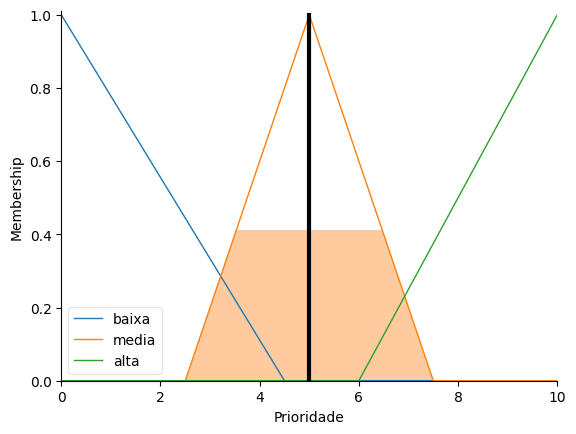

In [ ]:

# Regras fuzzy
# rule1 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['baixo'] & andar_elevador['baixo'], prioridade['alta'])
# rule2 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['medio'] & andar_elevador['baixo'], prioridade['alta'])
# rule3 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['alto'] & andar_elevador['medio'], prioridade['alta'])

# rule4 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'] & andar_pessoa['baixo'] & andar_elevador['baixo'], prioridade['media'])
# rule5 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'] & andar_pessoa['medio'] & andar_elevador['medio'], prioridade['media'])
# rule6 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'] & andar_pessoa['alto'] & andar_elevador['alto'], prioridade['media'])

# rule7 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['leve'] & andar_pessoa['baixo'] & andar_elevador['baixo'], prioridade['media'])
# rule8 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['medio'] & andar_elevador['medio'], prioridade['baixa'])
# rule9 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['alto'] & andar_elevador['alto'], prioridade['baixa'])

# rule10 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['metade'] & andar_pessoa['baixo'] & andar_elevador['baixo'], prioridade['media'])
# rule11 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['medio'] & andar_elevador['medio'], prioridade['baixa'])
# rule12 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['descendo'] & carga_pessoas['vazio'] & andar_pessoa['alto'] & andar_elevador['alto'], prioridade['baixa'])

# rule13 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['max'] & andar_pessoa['baixo'] & andar_elevador['baixo'], prioridade['media'])
# rule14 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['max'] & andar_pessoa['medio'] & andar_elevador['medio'], prioridade['baixa'])
# rule15 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['max'] & andar_pessoa['alto'] & andar_elevador['alto'], prioridade['baixa'])
# rule16 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['subindo'] & carga_pessoas['max'] & andar_pessoa['medio'] & andar_elevador['medio'], prioridade['baixa'])
# rule17 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['max'] & andar_pessoa['baixo'] & andar_elevador['baixo'], prioridade['media'])

rule1 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['media'])
rule2 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['leve'], prioridade['media'])
rule3 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['metade'], prioridade['alta'])
rule4 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['alta'])
rule5 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['parado'] & carga_pessoas['leve'], prioridade['alta'])
rule6 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['media'])
rule7 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['alta']) #
rule17 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['metade'], prioridade['media'])
rule18 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['media'])


rule8 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])
rule19 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['leve'], prioridade['baixa'])
rule9 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['baixa'])
rule10 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['parado'] & carga_pessoas['leve'], prioridade['media'])
rule11 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['leve'], prioridade['media']) #
rule12 = ctrl.Rule(distancia_elev_andar['medio'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])

rule13 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['descendo'] & carga_pessoas['vazio'], prioridade['baixa'])
rule14 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['metade'], prioridade['media'])
rule15 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['parado'] & carga_pessoas['max'], prioridade['baixa'])
rule16 = ctrl.Rule(distancia_elev_andar['longe'] & direcao_elev['subindo'] & carga_pessoas['max'], prioridade['baixa'])
# rule14 = ctrl.Rule(distancia_elev_andar['perto'] & direcao_elev['descendo'] & carga_pessoas['max'], prioridade['alta'])

# Exemplo de entradas
# andar_pessoa = int(input("Andar atual da pessoa: "))
# andar_atual_elev = int(input("Andar atual do elevador: "))
# direcao = int(input("Direção do elevador (-1, 0 ou 1): "))  # Direção do elevador (1: subindo, -1: descendo, 0: parado)
# carga = int(input("Carga atual do elevador (em Kg): "))
andar_pessoa = 9
andar_atual_elev = 10
direcao = -1 # Direção do elevador (1: subindo, -1: descendo, 0: parado)
carga = 70

# Cálculo da distância
distancia = abs(andar_atual_elev - andar_pessoa)
print(f"Distância: {distancia}")
# Pré-processamento: Verificação das condições (nesse caso, se está perto do limite de peso e se o elevador está se afastando)
if andar_pessoa == andar_atual_elev and direcao == 0:
      print("Elevador parado no mesmo andar da solicitação. Prioridade é total.")
      prioridade_final = 10
elif carga > 410:
      print("Elevador na capacidade total, prioridade é zero.")
      prioridade_final = 0
      # break
elif (direcao < 0 and andar_atual_elev < andar_pessoa) or (direcao > 0 and andar_atual_elev > andar_pessoa):
    print("Elevador se afastando, prioridade é zero.")
    prioridade_final = 0
else:
    #Caso as condições sejam atendidas, executa o sistema de controle Fuzzy
    elevator_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule15, rule16, rule17, rule18, rule19])
    elevator_sim = ctrl.ControlSystemSimulation(elevator_ctrl)
    elevator_sim.input['Distancia_Elev_Andar'] = distancia
    elevator_sim.input['Direcao_Elev'] = direcao
    elevator_sim.input['Carga_Pessoas'] = carga
    elevator_sim.compute()

    # prioridade_final = elevator_sim.output['Prioridade']
    # print(f"Prioridade final: {prioridade_final}")
    print(elevator_sim.output)
    prioridade.view(sim=elevator_sim)
